In [1]:
%matplotlib notebook
from omegaconf import DictConfig, OmegaConf
from hydra import initialize, initialize_config_module, initialize_config_dir, compose
import gym
import numpy as np
from hydra.core.hydra_config import HydraConfig
from mbrl.third_party.pytorch_sac_pranz24.sac_reg_norm import SAC_REG
from mbrl.util.logger import Logger
from mbrl.util.replay_buffer import ReplayBuffer
import mbrl.constants
import matplotlib.pyplot as plt
initialize(version_base=None, config_path="./config")

hydra.initialize()

In [2]:
cfg=compose(config_name="config.yaml", overrides =  ["sim_config=cartpole-v1",
                                                     "sim_config.t_max=30"])

In [3]:
env = gym.make('gym_custom:' + cfg.sim_config.name, cfg = cfg.sim_config)
agent = SAC_REG(env.observation_space.shape[0], env.action_space, cfg.train_config.algorithm)
agent.load_checkpoint("logs/Under_Act_Cartpole_Agent2.pt")

/home/dsubhasish/miniconda3/envs/f_imp/lib/python3.10/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


Loading models from logs/Under_Act_Cartpole_Agent2.pt


In [4]:
states = []
rewards = []
Us = []
# u[1,0] = -1
state = env.reset(init_state=np.array([[0.99, np.pi, 0, 0]]).T)
print(state)
done =  False
for i in range(10000):
    u = agent.select_action(state, evaluate= True)
    Us.append(u)
    state, reward, done, info = env.step(u)
    states.append(state)
    rewards.append(reward)
    if done: 
        break
states = np.array(states)
rewards = np.array(rewards)

[0.99       3.14159265 0.         0.         0.        ]


<IPython.core.display.Javascript object>


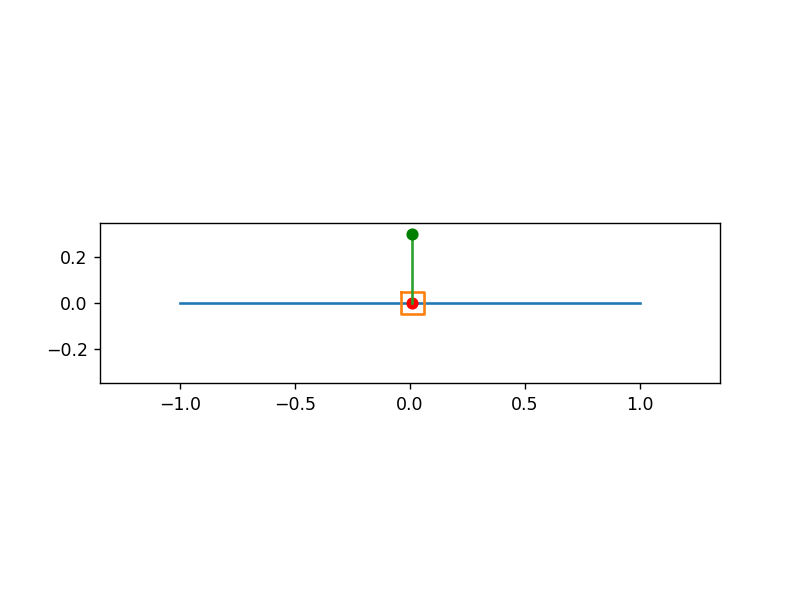

In [5]:
env.animate(states)
    

<IPython.core.display.Javascript object>


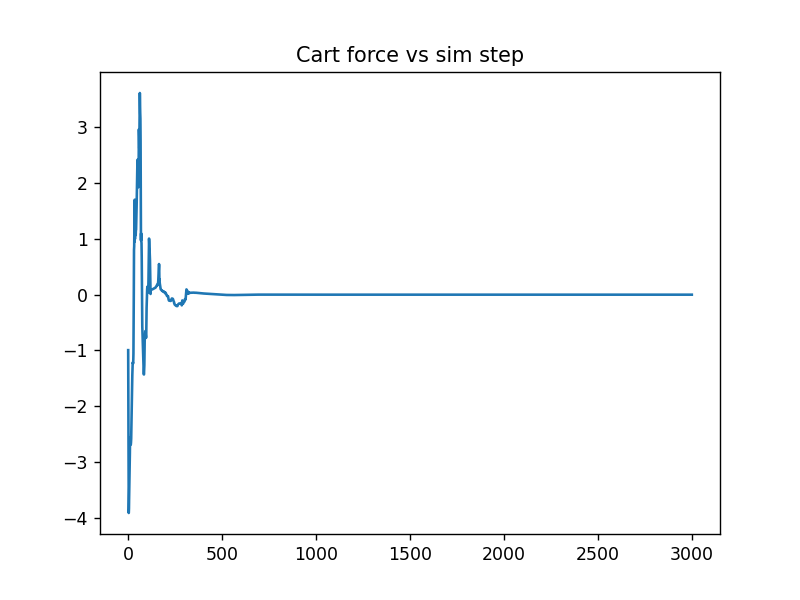

Text(0.5, 1.0, 'Cart force vs sim step')

In [6]:
plt.figure(200)
plt.plot(states[:,-1])
plt.title("Cart force vs sim step")